In [1]:
import statsbomb as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# read 18/19 season data with xg
shots_1819 = pd.read_csv('../data/output/shots_1819.csv')

In [3]:
shots_1819.head()

,season,match_date,period,timestamp,team,player,play_pattern,under_pressure,body_part,type,...,one_on_one,open_goal,key_pass_id,start_location_x,start_location_y,distance,angle,goal,statsbomb_xg,xg
0,2017/2018,2018-03-31,1,00:06:36.792,Barcelona,Andrés Iniesta Luján,Regular Play,0,Left Foot,Open Play,...,0,0,NaN,86.6,22.4,37.753410,10.735568,0,0.050151,0.011128
1,2017/2018,2018-03-31,1,00:08:43.631,Barcelona,Luis Alberto Suárez Díaz,Regular Play,0,Left Foot,Open Play,...,0,0,512c0970-9838-4031-b037-5d9e37a103f3,107.0,33.1,14.717676,27.403073,0,0.140516,0.249964
2,2017/2018,2018-03-31,1,00:17:31.857,Barcelona,Philippe Coutinho Correia,Regular Play,0,Right Foot,Open Play,...,0,0,70143966-c95e-42fc-b476-c273e4489a0c,89.0,23.0,35.355339,11.363497,0,0.014239,0.012129
3,2017/2018,2018-03-31,1,00:19:55.525,Barcelona,Jordi Alba Ramos,From Corner,0,Left Foot,Open Play,...,0,0,NaN,90.7,33.5,30.012331,14.838832,0,0.011210,0.001818
4,2017/2018,2018-03-31,1,00:23:22.112,Barcelona,Samuel Yves Umtiti,From Corner,1,Head,Open Play,...,0,0,ed8d7336-376b-4203-9aa8-9a042aaa70ea,107.4,38.1,12.742449,34.553852,0,0.020123,0.067696


In [4]:
# show lowest xG goals
shots_1819[shots_1819.goal==1].sort_values('xg', ascending=True).head()
# 1. xG - 0.022555 https://youtu.be/sJLiwa5f00Q?t=68
# 2. xG - 0.025952 https://youtu.be/08iGHj6A2go?t=629
# 3. xG - 0.039037 https://youtu.be/sMutPZupQdk?t=75

,season,match_date,period,timestamp,team,player,play_pattern,under_pressure,body_part,type,...,one_on_one,open_goal,key_pass_id,start_location_x,start_location_y,distance,angle,goal,statsbomb_xg,xg
209,2018/2019,2018-09-02,2,00:06:12.409,Barcelona,Ivan Rakitić,From Corner,0,Right Foot,Open Play,...,0,0,dcfb3115-fb49-4fa1-8873-f63553e6ef45,109.7,57.5,20.306157,11.744618,1,0.046866,0.022555
473,2018/2019,2018-10-20,2,00:42:43.029,Barcelona,Ivan Rakitić,From Free Kick,0,Right Foot,Open Play,...,0,0,NaN,104.1,58.1,24.091907,12.700238,1,0.022533,0.025952
539,2018/2019,2019-04-06,2,00:39:15.984,Barcelona,Luis Alberto Suárez Díaz,From Throw In,0,Right Foot,Open Play,...,0,0,64afc220-123c-45c5-9cb2-cf68de17e30c,97.7,28.8,24.954559,16.385194,1,0.033298,0.039037
361,2018/2019,2019-04-02,2,00:47:57.554,Barcelona,Luis Alberto Suárez Díaz,From Corner,0,Left Foot,Open Play,...,0,0,NaN,102.9,52.0,20.890428,18.024714,1,0.061100,0.041903
64,2018/2019,2019-01-13,2,00:13:23.782,Barcelona,Luis Alberto Suárez Díaz,From Throw In,1,Right Foot,Open Play,...,0,0,8ac507bf-4945-4a20-aedb-11ceef8b07fa,115.1,53.1,13.986422,12.311116,1,0.096050,0.061286


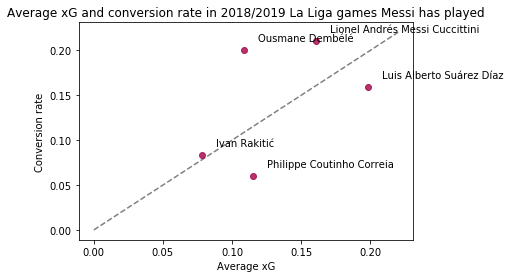

,player,conversion rate,average xG,difference
1,Ousmane Dembélé,0.200000,0.108589,0.091411
2,Lionel Andrés Messi Cuccittini,0.210227,0.160758,0.049470
3,Ivan Rakitić,0.083333,0.078556,0.004778
4,Luis Alberto Suárez Díaz,0.158879,0.198597,-0.039718
5,Philippe Coutinho Correia,0.059701,0.115013,-0.055312


In [8]:
# comparison between average xG and conversion rate

# list of barca's player
players = shots_1819['player'][shots_1819['team']=='Barcelona'].unique()

# initialize lists
conv_rates = []
avgs_xg = []
diffs = []
scorers = []

for player in players:
    # add values to lists only if the number of shot is greater than or equal to 30 
    if len(shots_1819[shots_1819['player']==player]) >= 30:
        # average xG
        avg_xg = np.mean(shots_1819['xg'][shots_1819['player']==player])
        # conversion rate
        conv_rate = np.mean(shots_1819['goal'][shots_1819['player']==player])
        # difference between conversion rate and average xG
        diff = conv_rate - avg_xg

        # add values to lists
        avgs_xg.append(avg_xg)
        conv_rates.append(conv_rate)
        diffs.append(diff)
        scorers.append(player)

# plot scatter plots
fig, ax = plt.subplots()

ax.plot([0, max(conv_rates)+0.01], [0, max(conv_rates)+0.01], c='gray', linestyle='dashed')
for (avg_xg, conv_rate, scorer) in zip(avgs_xg, conv_rates, scorers):
    ax.plot(avg_xg, conv_rate, c='#a40047', marker='o', alpha=0.8)
    ax.annotate(scorer, xy=(avg_xg+.01, conv_rate+.01))

ax.set_title('Average xG and conversion rate in 2018/2019 La Liga games Messi has played')
ax.set_xlabel('Average xG')
ax.set_ylabel('Conversion rate')
plt.show()

# show the result table 
table = pd.DataFrame({'player': scorers,
                      'conversion rate': conv_rates,
                      'average xG': avgs_xg,
                      'difference': diffs}
                     ).sort_values(by=['difference'], ascending=False)
table.index=range(1, len(table)+1)
table.head()

34it [00:19,  1.71it/s]


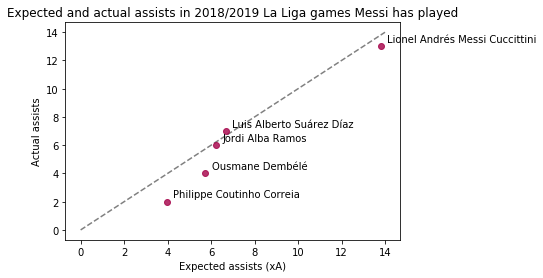

,player,assist,xA,difference
1,Lionel Andrés Messi Cuccittini,13,13.800369,-0.800369
2,Luis Alberto Suárez Díaz,7,6.669181,0.330819
3,Jordi Alba Ramos,6,6.222500,-0.222500
4,Ousmane Dembélé,4,5.735925,-1.735925
5,Philippe Coutinho Correia,2,3.953249,-1.953249


In [13]:
# comparison between xA and actual assists

# read the DataFrame of competiton
comps = sb.Competitions().get_dataframe()

# extract La Liga matches
competition_id = 11
season_ids = comps['season_id'][comps['competition_id']==competition_id].tolist()
season_names = comps['season_name'][comps['competition_id']==competition_id].tolist()
for i, season_id in enumerate(season_ids):
    matches_ = sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()
    # convert season id to season name 
    matches_['season'] = season_names[i]
    matches = matches_ if i == 0 else pd.concat([matches_, matches])
matches = matches.reset_index(drop=True)

# extract key pass data in 18/19 season 
for i, event_id in tqdm(enumerate(matches['match_id'][matches['season']=='2018/2019'])):
    events = sb.Events(event_id=str(event_id))
    passes_ = events.get_dataframe(event_type='pass')
    passes_ = passes_[passes_['id'].isin(shots_1819['key_pass_id'])]
    passes = passes_ if i == 0 else pd.concat([passes, passes_])
passes = passes.reset_index(drop=True)

# initialize lists
xas = []
assists = []
diffs = []
passers = []

for player in players:
    # key pass data on specified player
    key_passes = passes[passes['player']==player]
    # add values to lists only if the number of key pass is greater than or equal to 30 
    if len(key_passes) >= 30:
        # sum of xG created from the key pass (xA)
        xa = np.sum(shots_1819['xg'][shots_1819['key_pass_id'].isin(key_passes['id'])])
        # actual assists
        assist = len(key_passes[key_passes['goal_assist']==1])
        # difference between xA and actual assist
        diff = assist - xa

        # add values to lists
        xas.append(xa)
        assists.append(assist)
        diffs.append(diff)
        passers.append(player)

# plot scatter plot
fig, ax = plt.subplots()

ax.plot([0, max(assists)+1], [0, max(assists)+1], c='gray', linestyle='dashed')
for (xa, assist, passer) in zip(xas, assists, passers):
    ax.plot(xa, assist, c='#a40047', marker='o', alpha=0.8)
    ax.annotate(passer, xy=(xa+.3, assist+.3))

ax.set_title('Expected and actual assists in 2018/2019 La Liga games Messi has played')
ax.set_xlabel('Expected assists (xA)')
ax.set_ylabel('Actual assists')
plt.show()
print()

# show the result table
table = pd.DataFrame({'player': passers,
                      'assist': assists,
                      'xA': xas,
                      'difference': diffs},
                      ).sort_values(by=['xA'], ascending=False)
table.index = range(1, len(table)+1)
table.head()